In [69]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
os.getcwd()

'/Users/neelumeena/Documents/Machine Learning/20230404_MNIST_digit_classifier/code'

In [5]:
data_directory = '/Users/neelumeena/Documents/Machine Learning/20230404_MNIST_digit_classifier/data'

In [11]:
os.listdir(data_directory)

['test.csv.zip', 'train.csv.zip', 'sample_submission.csv']

In [12]:
train = pd.read_csv(data_directory+'/train.csv.zip',compression='zip')
test = pd.read_csv(data_directory+'/test.csv.zip',compression='zip')
sample_submission = pd.read_csv(data_directory+'/sample_submission.csv')

In [13]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
sample_submission

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


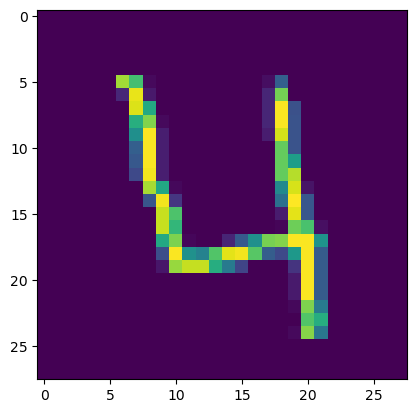

In [29]:
#np.array(train.iloc[0])
#train.loc[0,train.columns!='label']
#np.array(train.loc[0,train.columns!='label']).reshape((28,28))
plt.imshow(np.array(train.loc[3,train.columns!='label']).reshape((28,28)))

In [ ]:
'''
What should be included in this EDA?
1. A plot showing how each row is transformed into image. Show for first 64 rows.
2. Five number summaries of each column, but show only where the values are not zero, as the count of columns is too high - 784
3. Hierarchical clustering or heatmap - this should be able to reveal which columns are crucial for which labels.
'''

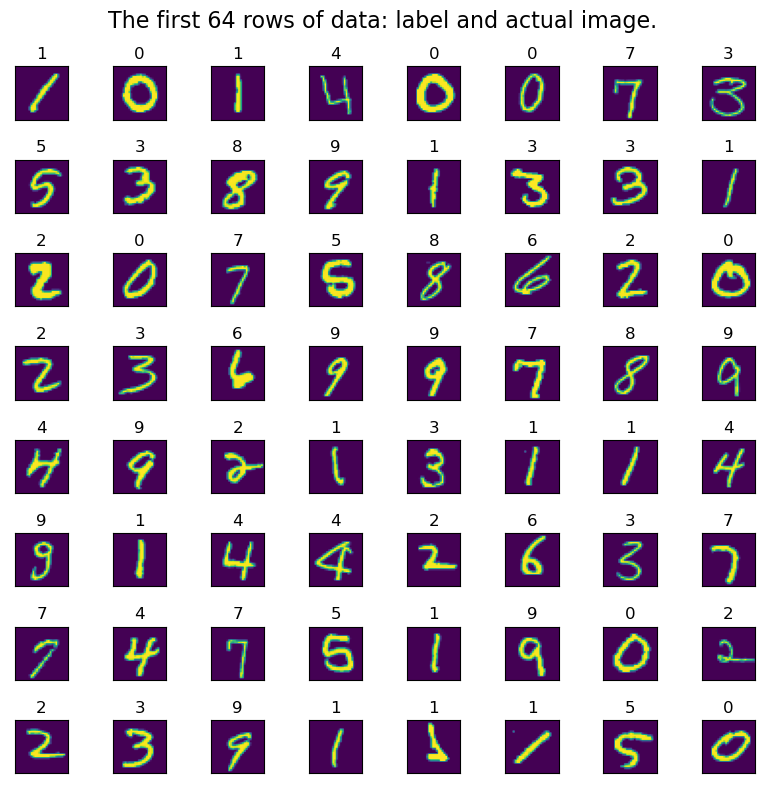

In [43]:
fig, axs = plt.subplots(nrows=8,ncols=8,figsize=(8, 8))
fig.suptitle('The first 64 rows of data: label and actual image.', fontsize=16)
for i in range(8):
    for j in range(8):
        index_for_plot = 8*i + j
        data_for_plot = np.array(train.loc[index_for_plot,train.columns!='label']).reshape((28,28))
        title_for_plot = str(train.label[index_for_plot])
        axs[i,j].imshow(data_for_plot)
        axs[i,j].set_title(title_for_plot)
        axs[i,j].xaxis.set_tick_params(labelbottom=False)
        axs[i,j].yaxis.set_tick_params(labelleft=False)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
fig.tight_layout()
plt.show()

In [38]:
def data_summary(x):
    print(f'The number of rows in this dataframe are: {x.shape[0]}.')
    print(f'The number of columns in this dataframe are: {x.shape[1]}.')
    print(f'Of the {x.shape[1]} columns, {train.apply(np.sum,axis=0)[train.apply(np.sum,axis=0)==0].count()} have all values as zeroes.')
    print(f'All zero columns: {train.apply(np.sum,axis=0)[train.apply(np.sum,axis=0)==0].index}')

'1'

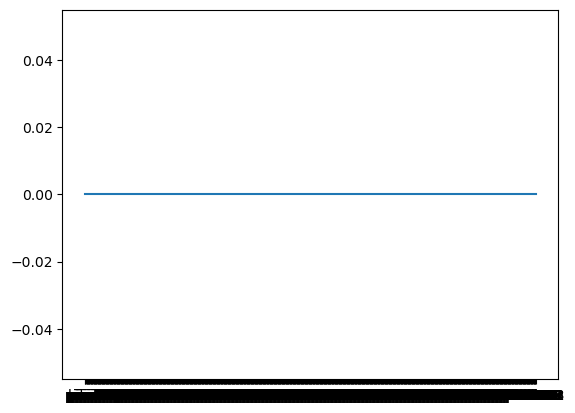

In [66]:
fig, ax = plt.subplots()
ax.plot(train.apply(np.min,axis=0))
plt.show()

In [61]:
print(f'All zero columns: {train.apply(np.sum,axis=0)[train.apply(np.sum,axis=0)==0].index}')

All zero columns: Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel16',
       'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22',
       'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28',
       'pixel29', 'pixel30', 'pixel31', 'pixel52', 'pixel53', 'pixel54',
       'pixel55', 'pixel56', 'pixel57', 'pixel82', 'pixel83', 'pixel84',
       'pixel85', 'pixel111', 'pixel112', 'pixel139', 'pixel140', 'pixel141',
       'pixel168', 'pixel196', 'pixel392', 'pixel420', 'pixel421', 'pixel448',
       'pixel476', 'pixel532', 'pixel560', 'pixel644', 'pixel645', 'pixel671',
       'pixel672', 'pixel673', 'pixel699', 'pixel700', 'pixel701', 'pixel727',
       'pixel728', 'pixel729', 'pixel730', 'pixel731', 'pixel754', 'pixel755',
       'pixel756', 'pixel757', 'pixel758', 'pixel759', 'pixel760', 'pixel780',
       'pixel781', 'pixel782', 'pixel783'],
      dtype='object')


In [70]:
#Ignoring this as it wouldn't make much sense
#linkage_data = linkage(, method='ward', metric='euclidean')
#dendrogram(linkage_data)